In [1]:
import pandas as pd
import numpy as np
import sqlite3

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
%%capture
%load_ext sql
%sql sqlite:///sample.db

In [3]:
path = r'C:\Users\akim\Documents'
fileName = 'QVI_purchase_behaviour.csv'

In [4]:
data = pd.read_csv(path + '/' + fileName)

In [5]:
data

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]

In [6]:
## another methode

In [7]:
df1 = pd.read_csv('QVI_purchase_behaviour.csv')

In [8]:
df1.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
#cheak for missing values
df1.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [11]:
#cheak for duplicates
df1.duplicated().sum()

0

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

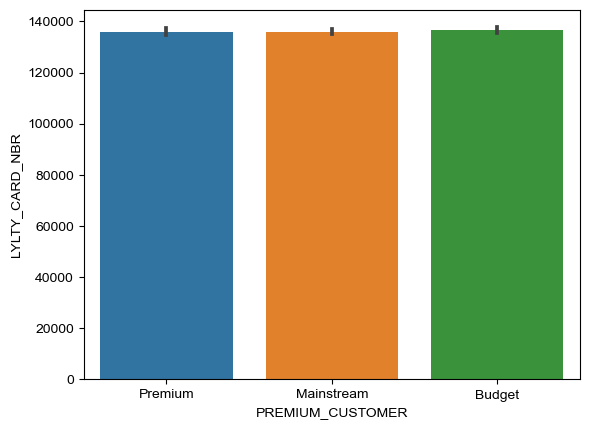

In [13]:
sns.barplot(data= df1, x=df1['PREMIUM_CUSTOMER'], y=df1['LYLTY_CARD_NBR'])
sns.set_style('darkgrid')

C:\Users\akim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LYLTY_CARD_NBR', ylabel='Count'>

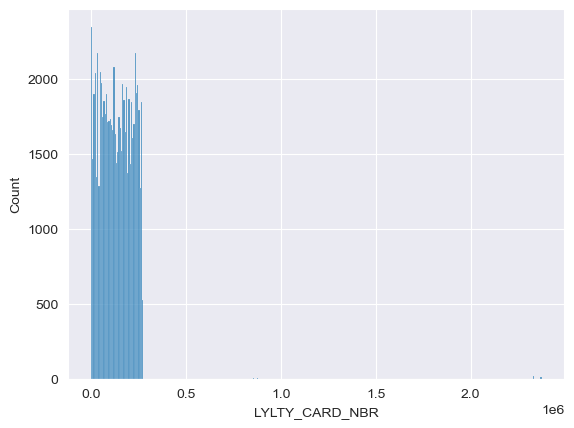

In [14]:
sns.histplot(data= df1['LYLTY_CARD_NBR'])

<Axes: >

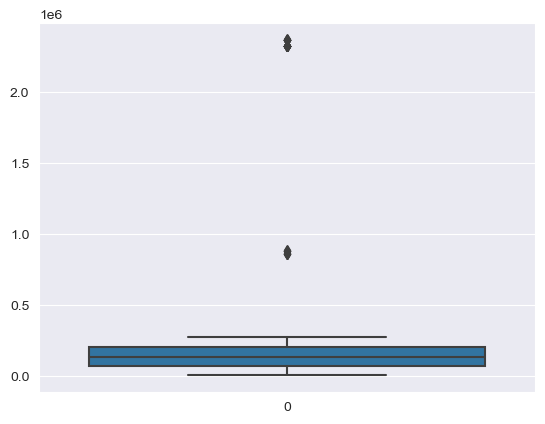

In [15]:
sns.boxplot(data=df1['LYLTY_CARD_NBR'])

In [16]:
#treat outliers
def treat_outliers(col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    UL = Q3 + (1.5*IQR)
    LL = Q1 - (1.5*IQR)
    
    return UL, LL

In [17]:
Upper_LYLTY_CARD_NBR, Lower_LYLTY_CARD_NBR = treat_outliers('LYLTY_CARD_NBR')

In [18]:
Upper_LYLTY_CARD_NBR

409134.5

In [19]:
Lower_LYLTY_CARD_NBR

-139557.5

In [20]:
df1['LYLTY_CARD_NBR'] = np.where(df1['LYLTY_CARD_NBR']>Upper_LYLTY_CARD_NBR,Upper_LYLTY_CARD_NBR,df1['LYLTY_CARD_NBR'])
df1['LYLTY_CARD_NBR'] = np.where(df1['LYLTY_CARD_NBR']<Lower_LYLTY_CARD_NBR,Lower_LYLTY_CARD_NBR,df1['LYLTY_CARD_NBR'])

<Axes: >

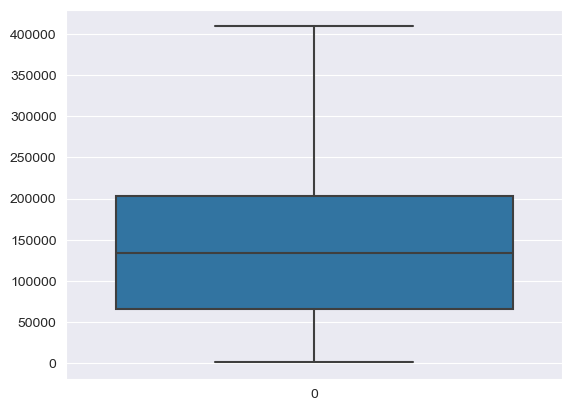

In [21]:
sns.boxplot(data=df1['LYLTY_CARD_NBR'])

In [22]:
df1.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [23]:
# the number of persone who has a FAMILY and belong to the PRENIUM class

df1[((df1['LIFESTAGE']=='NEW FAMILIES') | (df1['LIFESTAGE']=='YOUNG FAMILIES') | (df1['LIFESTAGE']=='OLDER FAMILIES')) & (df1['PREMIUM_CUSTOMER']=='Premium')]

LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER
6              1009.0    NEW FAMILIES          Premium
20             1027.0  OLDER FAMILIES          Premium
41             1062.0  YOUNG FAMILIES          Premium
47             1072.0    NEW FAMILIES          Premium
75             1114.0  OLDER FAMILIES          Premium
...               ...             ...              ...
72542        272313.0    NEW FAMILIES          Premium
72544        272318.0    NEW FAMILIES          Premium
72574        272354.0  YOUNG FAMILIES          Premium
72586        272370.0  YOUNG FAMILIES          Premium
72634        409134.5  YOUNG FAMILIES          Premium

[5295 rows x 3 columns]

In [24]:
# the number of people who are SINGLE and belong to the PRENIUM class

df1[((df1['LIFESTAGE']=='YOUNG SINGLES/COUPLES') | (df1['LIFESTAGE']=='OLDER SINGLES/COUPLES') | (df1['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') ) & (df1['PREMIUM_CUSTOMER']=='Premium')]

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0              1000.0   YOUNG SINGLES/COUPLES          Premium
13             1019.0   OLDER SINGLES/COUPLES          Premium
16             1023.0  MIDAGE SINGLES/COUPLES          Premium
17             1024.0   YOUNG SINGLES/COUPLES          Premium
19             1026.0  MIDAGE SINGLES/COUPLES          Premium
...               ...                     ...              ...
72602        272392.0  MIDAGE SINGLES/COUPLES          Premium
72603        409134.5   OLDER SINGLES/COUPLES          Premium
72608        409134.5   OLDER SINGLES/COUPLES          Premium
72611        409134.5  MIDAGE SINGLES/COUPLES          Premium
72628        409134.5   OLDER SINGLES/COUPLES          Premium

[9755 rows x 3 columns]

In [25]:
# the number of people who are RETIREES and belong to the PRENIUM class

df1[(df1['LIFESTAGE']=='RETIREES') & (df1['PREMIUM_CUSTOMER']=='Premium')]

LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
23             1034.0  RETIREES          Premium
54             1087.0  RETIREES          Premium
59             1093.0  RETIREES          Premium
69             1105.0  RETIREES          Premium
73             1111.0  RETIREES          Premium
...               ...       ...              ...
72549        272323.0  RETIREES          Premium
72560        272339.0  RETIREES          Premium
72566        272346.0  RETIREES          Premium
72570        272350.0  RETIREES          Premium
72613        409134.5  RETIREES          Premium

[3872 rows x 3 columns]

In [26]:
# the number of persone who has a FAMILY and belong to the MAINSTREAM class

df1[((df1['LIFESTAGE']=='NEW FAMILIES') | (df1['LIFESTAGE']=='YOUNG FAMILIES') | (df1['LIFESTAGE']=='OLDER FAMILIES')) & (df1['PREMIUM_CUSTOMER']=='Mainstream')]

LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER
9              1012.0  OLDER FAMILIES       Mainstream
11             1016.0  OLDER FAMILIES       Mainstream
24             1038.0  OLDER FAMILIES       Mainstream
25             1039.0  YOUNG FAMILIES       Mainstream
28             1044.0  YOUNG FAMILIES       Mainstream
...               ...             ...              ...
72519        272280.0  YOUNG FAMILIES       Mainstream
72535        272302.0  OLDER FAMILIES       Mainstream
72582        272364.0  YOUNG FAMILIES       Mainstream
72620        409134.5  YOUNG FAMILIES       Mainstream
72633        409134.5  YOUNG FAMILIES       Mainstream

[6408 rows x 3 columns]

In [27]:
# the number of persone who has a FAMILY and belong to the BUDGET class

df1[((df1['LIFESTAGE']=='NEW FAMILIES') | (df1['LIFESTAGE']=='YOUNG FAMILIES') | (df1['LIFESTAGE']=='OLDER FAMILIES')) & (df1['PREMIUM_CUSTOMER']=='Budget')]

LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER
2              1003.0  YOUNG FAMILIES           Budget
15             1022.0  OLDER FAMILIES           Budget
18             1025.0  YOUNG FAMILIES           Budget
27             1043.0  YOUNG FAMILIES           Budget
31             1050.0  YOUNG FAMILIES           Budget
...               ...             ...              ...
72606        409134.5  YOUNG FAMILIES           Budget
72607        409134.5  OLDER FAMILIES           Budget
72609        409134.5  OLDER FAMILIES           Budget
72626        409134.5  OLDER FAMILIES           Budget
72635        409134.5  OLDER FAMILIES           Budget

[9804 rows x 3 columns]

In [28]:
# the number of people who are SINGLE and belong to the MAINSTREAM class

df1[((df1['LIFESTAGE']=='YOUNG SINGLES/COUPLES') | (df1['LIFESTAGE']=='OLDER SINGLES/COUPLES') | (df1['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') ) & (df1['PREMIUM_CUSTOMER']=='Mainstream')]

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
1              1002.0   YOUNG SINGLES/COUPLES       Mainstream
3              1004.0   OLDER SINGLES/COUPLES       Mainstream
4              1005.0  MIDAGE SINGLES/COUPLES       Mainstream
7              1010.0   YOUNG SINGLES/COUPLES       Mainstream
8              1011.0   OLDER SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72623        409134.5   YOUNG SINGLES/COUPLES       Mainstream
72625        409134.5   OLDER SINGLES/COUPLES       Mainstream
72629        409134.5   YOUNG SINGLES/COUPLES       Mainstream
72632        409134.5  MIDAGE SINGLES/COUPLES       Mainstream
72636        409134.5   YOUNG SINGLES/COUPLES       Mainstream

[16358 rows x 3 columns]

In [29]:
# the number of people who are SINGLE and belong to the BUDGET class

df1[((df1['LIFESTAGE']=='YOUNG SINGLES/COUPLES') | (df1['LIFESTAGE']=='OLDER SINGLES/COUPLES') | (df1['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') ) & (df1['PREMIUM_CUSTOMER']=='Budget')]

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
5              1007.0   YOUNG SINGLES/COUPLES           Budget
21             1028.0   YOUNG SINGLES/COUPLES           Budget
29             1046.0   YOUNG SINGLES/COUPLES           Budget
32             1051.0   YOUNG SINGLES/COUPLES           Budget
33             1052.0  MIDAGE SINGLES/COUPLES           Budget
...               ...                     ...              ...
72618        409134.5  MIDAGE SINGLES/COUPLES           Budget
72622        409134.5   YOUNG SINGLES/COUPLES           Budget
72627        409134.5   OLDER SINGLES/COUPLES           Budget
72630        409134.5   OLDER SINGLES/COUPLES           Budget
72631        409134.5   OLDER SINGLES/COUPLES           Budget

[10212 rows x 3 columns]

In [30]:
# the number of people who are RETIREES and belong to the MAINSTREAM class

df1[(df1['LIFESTAGE']=='RETIREES') & (df1['PREMIUM_CUSTOMER']=='Mainstream')]

LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
22             1030.0  RETIREES       Mainstream
36             1055.0  RETIREES       Mainstream
56             1089.0  RETIREES       Mainstream
61             1095.0  RETIREES       Mainstream
65             1101.0  RETIREES       Mainstream
...               ...       ...              ...
72539        272308.0  RETIREES       Mainstream
72540        272309.0  RETIREES       Mainstream
72587        272372.0  RETIREES       Mainstream
72614        409134.5  RETIREES       Mainstream
72616        409134.5  RETIREES       Mainstream

[6479 rows x 3 columns]

In [31]:
# the number of people who are RETIREES and belong to the BUDGET class

df1[(df1['LIFESTAGE']=='RETIREES') & (df1['PREMIUM_CUSTOMER']=='Budget')]

LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
10             1013.0  RETIREES           Budget
48             1074.0  RETIREES           Budget
51             1080.0  RETIREES           Budget
63             1097.0  RETIREES           Budget
100            1152.0  RETIREES           Budget
...               ...       ...              ...
72585        272369.0  RETIREES           Budget
72604        409134.5  RETIREES           Budget
72615        409134.5  RETIREES           Budget
72619        409134.5  RETIREES           Budget
72624        409134.5  RETIREES           Budget

[4454 rows x 3 columns]

In [32]:
#load the second dataset 
path = r'C:\Users\akim\Documents'
fileName = 'QVI_transaction_data.csv'

In [33]:
df2 = pd.read_csv(path + '/' + fileName)

In [34]:
df2.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [35]:
#cheak for info of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [36]:
#cheak for mising values
df2.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [37]:
#cheak for duplicated
df2.duplicated().sum()

1

In [38]:
#remove the duplicated in the data
df2.drop_duplicates(inplace=True)

In [39]:
df2.duplicated().sum()

0

In [40]:
list(df2.PROD_NAME.unique())[:]

['Natural Chip        Compny SeaSalt175g',
 'CCs Nacho Cheese    175g',
 'Smiths Crinkle Cut  Chips Chicken 170g',
 'Smiths Chip Thinly  S/Cream&Onion 175g',
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
 'Old El Paso Salsa   Dip Tomato Mild 300g',
 'Smiths Crinkle Chips Salt & Vinegar 330g',
 'Grain Waves         Sweet Chilli 210g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Grain Waves Sour    Cream&Chives 210G',
 'Kettle Sensations   Siracha Lime 150g',
 'Twisties Cheese     270g',
 'WW Crinkle Cut      Chicken 175g',
 'Thins Chips Light&  Tangy 175g',
 'CCs Original 175g',
 'Burger Rings 220g',
 'NCC Sour Cream &    Garden Chives 175g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Cheezels Cheese Box 125g',
 'Smiths Crinkle      Original 330g',
 'Infzns Crn Crnchers Tangy Gcamole 110g',
 'Kettle Sea Salt     And Vinegar 175g',
 'Smiths Chip Thinly  Cut Original 175g',
 'Kettle Original 175g',
 'Red Rock Deli Thai  Chilli&Lime 150g',
 'Pringles Sthrn FriedChicken 134g',
 'Pringle

In [41]:
Q1, Q3 = np.quantile(df2['TXN_ID'], [0.25, 0.75])

In [42]:
print(Q1, Q3)

67601.0 202701.5


In [43]:
#cheak for outliers
IQR = Q3 - Q1
lower = Q1 -(1.5*IQR)
upper = Q3 +(1.5*IQR)
print(lower, upper)

-135049.75 405352.25


In [44]:
Q1, Q3 = np.quantile(df2['TOT_SALES'], [0.25, 0.75])
print(Q1, Q3)

5.4 9.2


In [45]:
IQR = Q3 - Q1
lower = Q1 -(1.5*IQR)
upper = Q3 +(1.5*IQR)
print(lower, upper)

-0.29999999999999805 14.899999999999999


In [46]:
Q1, Q3 = np.quantile(df2['PROD_QTY'], [0.25, 0.75])
print(Q1, Q3)

2.0 2.0


In [47]:
IQR = Q3 - Q1
lower = Q1 -(1.5*IQR)
upper = Q3 +(1.5*IQR)
print(lower, upper)

2.0 2.0


In [48]:
df = pd.merge(df1, df2, on='LYLTY_CARD_NBR')

C:\Users\akim\AppData\Local\Temp\ipykernel_12144\3226208256.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = pd.merge(df1, df2, on='LYLTY_CARD_NBR')


In [49]:
df.head()

LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0          1000.0  YOUNG SINGLES/COUPLES          Premium  43390          1   
1          1002.0  YOUNG SINGLES/COUPLES       Mainstream  43359          1   
2          1003.0         YOUNG FAMILIES           Budget  43531          1   
3          1003.0         YOUNG FAMILIES           Budget  43532          1   
4          1004.0  OLDER SINGLES/COUPLES       Mainstream  43406          1   

   TXN_ID  PROD_NBR                               PROD_NAME  PROD_QTY  \
0       1         5  Natural Chip        Compny SeaSalt175g         2   
1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g         1   
2       3        52   Grain Waves Sour    Cream&Chives 210G         1   
3       4       106  Natural ChipCo      Hony Soy Chckn175g         1   
4       5        96          WW Original Stacked Chips 160g         1   

   TOT_SALES  
0        6.0  
1        2.7  
2        3.6  
3        3.0  
4        1.9

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264791 entries, 0 to 264790
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264791 non-null  float64
 1   LIFESTAGE         264791 non-null  object 
 2   PREMIUM_CUSTOMER  264791 non-null  object 
 3   DATE              264791 non-null  int64  
 4   STORE_NBR         264791 non-null  int64  
 5   TXN_ID            264791 non-null  int64  
 6   PROD_NBR          264791 non-null  int64  
 7   PROD_NAME         264791 non-null  object 
 8   PROD_QTY          264791 non-null  int64  
 9   TOT_SALES         264791 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.2+ MB


In [51]:
df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [53]:
df.describe()

LYLTY_CARD_NBR           DATE      STORE_NBR        TXN_ID  \
count   264791.000000  264791.000000  264791.000000  2.647910e+05   
mean    135254.693192   43464.040560     135.083103  1.351488e+05   
std      76785.261866     105.385915      76.786334  7.813097e+04   
min       1000.000000   43282.000000       1.000000  1.000000e+00   
25%      70018.500000   43373.000000      70.000000  6.758850e+04   
50%     130353.000000   43464.000000     130.000000  1.351290e+05   
75%     203087.000000   43555.000000     203.000000  2.026815e+05   
max     272392.000000   43646.000000     272.000000  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264791.000000  264791.000000  264791.000000  
mean       56.584423       1.907331       7.304180  
std        32.826373       0.643684       3.083273  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.000000       2.000000       9.200000  
max       114.000000     200.000000     650.000000

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264791 entries, 0 to 264790
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264791 non-null  float64
 1   LIFESTAGE         264791 non-null  object 
 2   PREMIUM_CUSTOMER  264791 non-null  object 
 3   DATE              264791 non-null  int64  
 4   STORE_NBR         264791 non-null  int64  
 5   TXN_ID            264791 non-null  int64  
 6   PROD_NBR          264791 non-null  int64  
 7   PROD_NAME         264791 non-null  object 
 8   PROD_QTY          264791 non-null  int64  
 9   TOT_SALES         264791 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.2+ MB


In [55]:
from ydata_profiling import ProfileReport

In [56]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
#from pivottablejs import pivot_ui

In [58]:
#pivot_ui(df)

<Axes: xlabel='LIFESTAGE'>

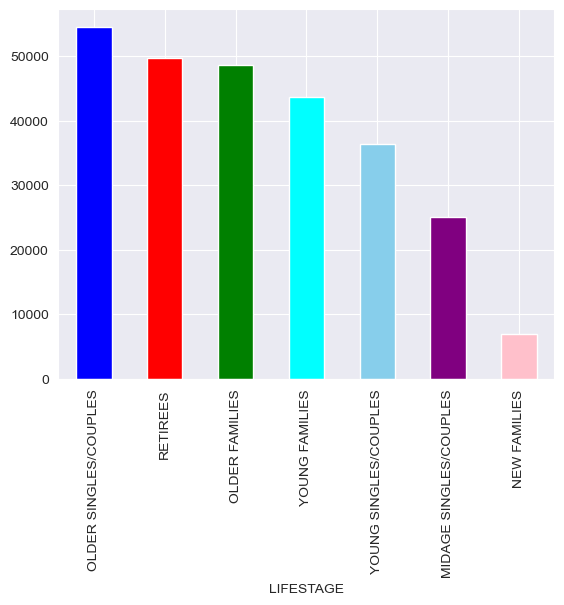

In [59]:
c=['blue', 'red', 'green', 'cyan', 'skyblue', 'purple', 'pink']
df['LIFESTAGE'].value_counts().plot(kind='bar', color=c)

In [60]:
LIFESTAGE=df['LIFESTAGE'].value_counts()

In [61]:
labels=LIFESTAGE.index

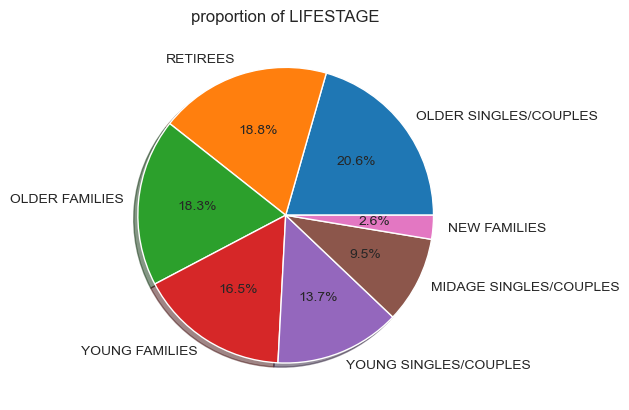

In [62]:
plt.pie(LIFESTAGE, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('proportion of LIFESTAGE');

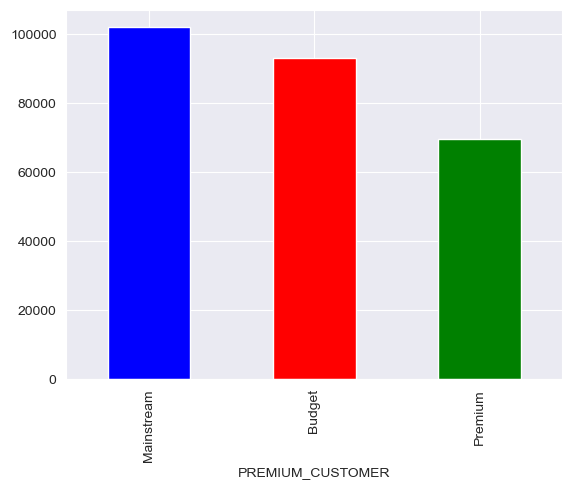

In [63]:
df['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar', color=c);

In [64]:
PREMIUM_CUST=df['PREMIUM_CUSTOMER'].value_counts()

In [65]:
labels=PREMIUM_CUST.index

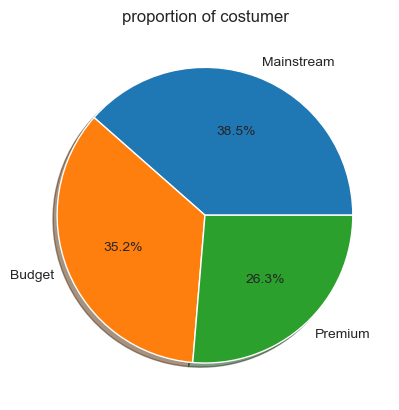

In [66]:
plt.pie(PREMIUM_CUST, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('proportion of costumer');

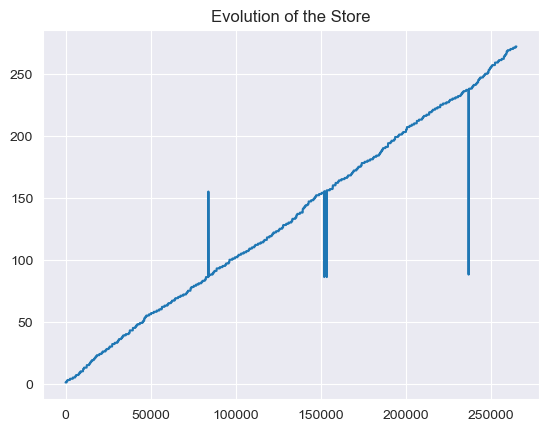

In [67]:
df['STORE_NBR'].plot()
plt.title('Evolution of the Store');

# building a dashboard with matplotlib

In [68]:
fig = plt.figure(figsize=(20,16))
ax = [None for _ in range(7)]

<Figure size 2000x1600 with 0 Axes>

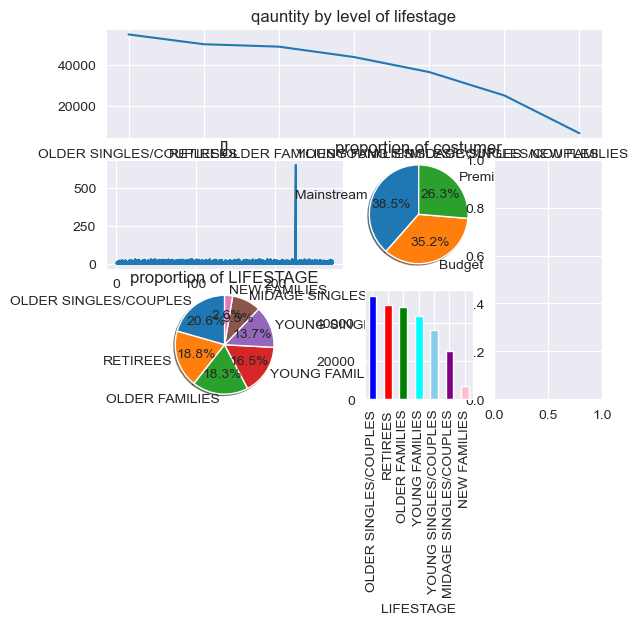

In [69]:
# create a dashboard canvas
ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=2)
#ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=2)
ax[6] = plt.subplot2grid((3,4), (2,2), colspan=1)

# load the content into subplots

c=['blue', 'red', 'green', 'cyan', 'skyblue', 'purple', 'pink']
df['LIFESTAGE'].value_counts().plot(kind='bar', color=c)
ax[0].plot(df['LIFESTAGE'].value_counts())
ax[0].set_title('qauntity by level of lifestage');

ax[1].plot(df['STORE_NBR'], df['TOT_SALES'])
ax[1].set_title('[]');


ax[3].pie(x=PREMIUM_CUST, labels=labels, startangle=90, autopct='%1.1f%%', shadow=True)
ax[3].axis('equal')
ax[3].set_title('proportion of costumer');

ax[5].pie(x=LIFESTAGE, labels=LIFESTAGE.index, startangle=90, autopct='%1.1f%%', shadow=True)
ax[5].axis('equal')
ax[5].set_title('proportion of LIFESTAGE');

#clr=['blue', 'red', 'green']
#df['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar', color=clr);
